# Exporatory data analysis
## Defining the business question

The business question: "What types of films are currently doing well in box office? And how can Microsoft tap into the film industry by creating similar movies?

## Importation of libraries for the project

In [224]:
import pandas as pd
import sqlite3 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


## Loading and preview of the data sets

### Importing the gross movie csv file

In [225]:
#Importing gross movie data 
movie_gross = pd.read_csv("data/bom_movie_gross.csv")

#A preview of top 5 rows
movie_gross.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [226]:
#A preview of the bottom 5 rows
movie_gross.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,,2018
3383,Edward II (2018 re-release),FM,4800.0,,2018
3384,El Pacto,Sony,2500.0,,2018
3385,The Swan,Synergetic,2400.0,,2018
3386,An Actor Prepares,Grav.,1700.0,,2018


In [227]:
#Reviewing the number of rows and columns
movie_gross.shape

(3387, 5)

In [228]:
#Checking the number of rows of each column to identify null values
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   title                                                                3387 non-null   object
 1   studio                                                               3387 non-null   object
 2   domestic_gross                                                       3387 non-null   object
 3   foreign_gross                                                        3387 non-null   object
 4   year                                                                 3387 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 132.4+ KB


In [229]:
#checking the number of rows of each column. 
movie_gross.count()

title                                                                  3387
studio                                                                 3387
domestic_gross                                                         3387
foreign_gross                                                          3387
year                                                                   3387
dtype: int64

In [230]:
movie_gross.describe()

,year
count,3387.000000
mean,2013.958075
std,2.478141
min,2010.000000
25%,2012.000000
50%,2014.000000
75%,2016.000000
max,2018.000000


In [231]:
movie_gross.columns

Index(['title                                                              ',
       'studio       ', 'domestic_gross ', 'foreign_gross ', 'year'],
      dtype='object')

In [232]:
#Getting rid of white spaces in the column names. 
movie_gross.columns = movie_gross.columns.str.strip()

In [233]:
#Finding the number of unique studios in the dataframe
unique_movie_studio = movie_gross["studio"].nunique()
unique_movie_studio

258

### 1.2 Importing the movie basics and movie gross data frames from the IM.db database file

In [312]:
# Connecting to the database file:
conn = sqlite3.connect("data/im.db")

In [313]:
#VIewing all the tables from the database
im_db = pd.read_sql("""
    SELECT name
    FROM sqlite_master
    WHERE type = "table";
""",
conn
)
print(im_db)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [314]:
#Selecting the movie basics and movie ratings table
movie_basics = pd.read_sql('SELECT * FROM movie_basics', conn)

In [315]:
movie_basics.shape

(146144, 6)

In [316]:
#A preview of movie basics
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [317]:
#Checking the top 5 rows of the data set
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [318]:
#Checking the bottom 5 rows 
movie_basics.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [319]:
#Checking the number of rows in each column
movie_basics.count()

movie_id           146144
primary_title      146144
original_title     146123
start_year         146144
runtime_minutes    114405
genres             140736
dtype: int64

In [321]:
#Checking the summary statistics
movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [323]:
#Importing the movie ratings dataFrame
movie_ratings = pd.read_sql('SELECT * FROM movie_ratings', conn)


In [325]:
#Checking the column data types
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [326]:
#Calculating the summary statistics for numerical data
movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [327]:
#Previewing the top 5 columns: 
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [328]:
#Previewing the bottom 5 columns: 
movie_ratings.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


## Cleaning the dataframes

Defining functions to be used in data cleaing: 

In [346]:
# function to check for missing values
def sum_null_values_in_rows(df):
    # Calculate the sum of null values for each row
    null_values_count_per_row = df.isnull().sum()
    return null_values_count_per_row

In [338]:
#A function to calculate the percentage of missing values. 
def missing_data_analysis(df):
    missing_percentage = df.isnull().mean() * 100
    return missing_percentage

In [339]:
#A function to calculate the summary statistics of a dataframe: 
def summary_statistics(df):
    return df.describe()

Cleaning the movie_gross dataFrame

In [234]:
#Checking for null values
movie_gross.isnull().values.any()

False

In [235]:
#Checking for duplicate rows 
movie_gross.duplicated().sum()

0

In [236]:
#Removing white spaces from the title column
movie_gross["title"] = movie_gross["title"].str.strip()

In [237]:

# Check unique values in the "domestic_gross" column
unique_values = movie_gross["domestic_gross"].unique()
print(unique_values)



['   415000000.0 ' '   334200000.0 ' '   296000000.0 ' ...
 '       20700.0 ' '       12900.0 ' '        2400.0 ']


In [238]:

# Convert the 'domestic_gross' and 'foreign_gross' columns to numeric
movie_gross['domestic_gross'] = pd.to_numeric(movie_gross['domestic_gross'], errors='coerce')
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')

# Check the data types after conversion
print(movie_gross.dtypes)


title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object


In [329]:
#A preview of the cleaned dataFrame
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


Cleaning of the movie basics data frame

In [247]:
#checking if there are any null values in the movie basics data frame
movie_basics.isna().values.any()

True

The movie basics data frame contains null values. The percentages are calculated then dropped if necessary

In [347]:
#A sum of null values in each row. 
sum_null_values_in_rows(movie_basics)

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [251]:
#Calculating the tatal number of non null values
total_count = movie_basics.shape[0]
total_count

146144

In [345]:
#Calcuating the percentage of null values in each column using a function:
missing_data_analysis(movie_basics)

movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

In [253]:
#Dropping all the null values
movie_basics = movie_basics.dropna()

In [254]:
#Checking for any duplicate rows
movie_basics.duplicated().sum()

0

In [348]:
#Checking the new cleaned data frame
summary_statistics(movie_basics)

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


There are some anomalities in the runtime column. 
1. A movie of just one minute is extremely unusual. 
2. A movie of 51420 minutes is also highly abnormal. 

The two will be investigated.

In [331]:
short_movies_count = len(movie_basics[movie_basics["runtime_minutes"] < 30])
print(short_movies_count)

long_movies_count = len(movie_basics[movie_basics["runtime_minutes"] > 200])
print(long_movies_count)

4189
381


I have used a runtime of 30 minutes as the logical minimum runtime, and 200 minutes as the maximum. 

In [257]:

# Filter out rows with runtimes below 10 minutes or above 300 minutes (adjust thresholds as needed)
filtered_movie_basics = movie_basics[(movie_basics['runtime_minutes'] >= 30) & (movie_basics['runtime_minutes'] <= 300)]
filtered_movie_basics.describe()

# Now you can continue your analysis with the filtered data


,start_year,runtime_minutes
count,107932.000000,107932.000000
mean,2014.381147,87.507533
std,2.646682,25.054564
min,2010.000000,30.000000
25%,2012.000000,72.000000
50%,2014.000000,88.000000
75%,2017.000000,100.000000
max,2022.000000,300.000000


In [332]:
#A preview of the filtered movie basics data frame
filtered_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107932 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         107932 non-null  object 
 1   primary_title    107932 non-null  object 
 2   original_title   107932 non-null  object 
 3   start_year       107932 non-null  int64  
 4   runtime_minutes  107932 non-null  float64
 5   genres           107932 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.8+ MB


Cleaning the movie ratings table

In [334]:
#Checking the data types for the columns
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [349]:
#Checking for null values
sum_null_values_in_rows(movie_ratings)

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [350]:
#Summary statistics
summary_statistics(movie_ratings)

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


Combining the two data frames: movie basics and movie ratings

In [266]:
movies_df = pd.merge(movie_basics, movie_ratings, on = "movie_id", how="inner")
movies_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [351]:
#A preview of the resutlting data frame
summary_statistics(movies_df)

,start_year,runtime_minutes,averagerating,numvotes
count,65442.000000,65442.000000,65442.000000,6.544200e+04
mean,2014.257113,93.661150,6.316253,3.969923e+03
std,2.600149,22.130005,1.457265,3.215428e+04
min,2010.000000,30.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.300000e+01
75%,2016.000000,104.000000,7.300000,3.550000e+02
max,2019.000000,250.000000,10.000000,1.841066e+06


In [336]:
#Filtering to remove movies with minutes less than 30 minutes and more than 250 minutes
movies_df = movies_df[(movies_df['runtime_minutes'] >= 30) & (movies_df['runtime_minutes'] <= 250)]

In [337]:
#A preview of the resulting dataframes
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65442 entries, 0 to 65719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65442 non-null  object 
 1   primary_title    65442 non-null  object 
 2   original_title   65442 non-null  object 
 3   start_year       65442 non-null  int64  
 4   runtime_minutes  65442 non-null  float64
 5   genres           65442 non-null  object 
 6   averagerating    65442 non-null  float64
 7   numvotes         65442 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


## EDA for gross movies data

I will now dig into the movies data to generate insights

Exploring the first dataframe: movie_gross

In [271]:
movie_gross.info()
# # maximum_domestic_gross = movie_gross["domestic_gross"].max()
# # maximum_domestic_gross

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [272]:
# Sort the DataFrame by 'domestic_gross' in descending order
movies_domestic_sorted = movie_gross.sort_values(by='domestic_gross', ascending=False)

# Print the sorted Da
movies_domestic_sorted[:5]


,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,NaN,2015
3080,Black Panther,BV,700100000.0,646900000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,NaN,2018
1873,Jurassic World,Uni.,652300000.0,NaN,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012


BV studio has produced three of the highest domestic grossing films: 
1. Star wars: The force Awakens
2. Black Panther
3. Avengers Infinity War

In [273]:
movies_foreign_sorted = movie_gross.sort_values(by='foreign_gross', ascending=False)
movies_foreign_sorted[:5]

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018
1127,Frozen,BV,400700000.0,875700000.0,2013


The top 3 movies highest in foreign gross are: 
1. Harry Potter and teh Deathly Hallows Part 2 - WB studio
2. Avengers: Age of Ultron - BV studio
3. Marvel's The Avengers - BV studio

In [274]:
#Grouping the dataframe by studio
grouped_movies_gross_df = movie_gross.groupby('studio').first().reset_index()
grouped_movies_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          258 non-null    object 
 1   title           258 non-null    object 
 2   domestic_gross  256 non-null    float64
 3   foreign_gross   176 non-null    float64
 4   year            258 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 10.2+ KB


In [275]:
#Viewing the top 
grouped_movies_gross_foreign = grouped_movies_gross_df.sort_values(by='foreign_gross', ascending=False)
pd.set_option('display.max_colwidth', None)
grouped_movies_gross_foreign[:5]

,studio,title,domestic_gross,foreign_gross,year
109,HC,Wolf Warrior 2,2700000.0,867600000.0,2017
247,WB,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010
37,BV,Toy Story 3,415000000.0,652000000.0,2010
134,LG/S,The Twilight Saga: Breaking Dawn Part 2,292300000.0,537400000.0,2012
172,P/DW,Shrek Forever After,238700000.0,513900000.0,2010


In [276]:
# unique_genres = movies_df['genres'].unique()
# print("Unique genres:")
# for genre in unique_genres:
#     print(genre)
# len(genre)

## EDA For the movies dataframe

In [277]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65442 entries, 0 to 65719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65442 non-null  object 
 1   primary_title    65442 non-null  object 
 2   original_title   65442 non-null  object 
 3   start_year       65442 non-null  int64  
 4   runtime_minutes  65442 non-null  float64
 5   genres           65442 non-null  object 
 6   averagerating    65442 non-null  float64
 7   numvotes         65442 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [352]:
#Checking the statistical data
summary_statistics(movies_df)

,start_year,runtime_minutes,averagerating,numvotes
count,65442.000000,65442.000000,65442.000000,6.544200e+04
mean,2014.257113,93.661150,6.316253,3.969923e+03
std,2.600149,22.130005,1.457265,3.215428e+04
min,2010.000000,30.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.300000e+01
75%,2016.000000,104.000000,7.300000,3.550000e+02
max,2019.000000,250.000000,10.000000,1.841066e+06


In [279]:
# Group the DataFrame by the 'genres' column and aggregate it
grouped_movies_df_by_genre = movies_df.groupby("genres").agg({'numvotes': 'sum'})

# Sort the resulting DataFrame by 'numvotes' in descending order
grouped_movies_df_by_genre_sorted = grouped_movies_df_by_genre.sort_values(by="numvotes", ascending=False)

# # Reset the index to have a clean index for the resulting DataFrame
grouped_movies_df_by_genre_sorted.reset_index(inplace=True)

# Display the resulting DataFrame
grouped_movies_df_by_genre_sorted.head(5)


,genres,numvotes
0,"Action,Adventure,Sci-Fi",23023053
1,"Action,Adventure,Fantasy",9658805
2,"Adventure,Animation,Comedy",8687201
3,Drama,8340207
4,"Comedy,Drama,Romance",7662618


The top 5 movie genres according to the number of votes are: 
1.	Action,Adventure,Sci-Fi	
2.	Action,Adventure,Fantasy	
3.	Adventure,Animation,Comedy	
4.	Drama	
5.	Comedy,Drama,Romance	


In [280]:
# Group the DataFrame by the 'genres' column and aggregate it by number of ratings
grouped_movies_df_by_rating = movies_df.groupby("genres").agg({'averagerating': 'sum'})

# Sort the resulting DataFrame by 'average rating' in descending order
grouped_movies_df_by_rating_sorted = grouped_movies_df_by_numberOfVotes.sort_values(by="averagerating", ascending=False)

# # Reset the index to have a clean index for the resulting DataFrame
grouped_movies_df_by_rating_sorted.reset_index(inplace=True)

# Display the resulting DataFrame
grouped_movies_df_by_rating_sorted.head(5)

,genres,averagerating
0,Drama,65986.6
1,Documentary,65569.5
2,Comedy,26636.4
3,"Comedy,Drama",15602.4
4,Horror,10455.2


The top 5 movie genres according to ratings are: 
1.	Drama	
2.	Documentary	
3.	Comedy	
4.	Comedy,Drama	
5.	Horror	

In [281]:
# Group the DataFrame by the 'genres' column and aggregate it, including 'numvotes'
grouped_movies_df_by_runtime = movies_df.groupby("genres").agg({'runtime_minutes': 'sum', 'numvotes': 'sum'})

# Sort the resulting DataFrame by 'runtime_minutes' in descending order
grouped_movies_df_by_runtime_sorted = grouped_movies_df_by_runtime.sort_values(by="runtime_minutes", ascending=False)

# Reset the index to have a clean index for the resulting DataFrame
grouped_movies_df_by_runtime_sorted.reset_index(inplace=True)

# Create a new column 'vote_rank' to store the rankings based on 'numvotes'
grouped_movies_df_by_runtime_sorted['vote_rank'] = grouped_movies_df_by_runtime_sorted['numvotes'].rank(ascending=False, method='min')

# Display the resulting DataFrame
grouped_movies_df_by_runtime_sorted


,genres,runtime_minutes,numvotes,vote_rank
0,Drama,989182.0,8340207,4.0
1,Documentary,734019.0,1756650,37.0
2,Comedy,442849.0,6763496,7.0
3,"Comedy,Drama",241490.0,6449671,8.0
4,Horror,191077.0,1570709,41.0
...,...,...,...,...
900,"Adventure,Documentary,Fantasy",51.0,18,834.0
901,"Action,Adventure,Sport",50.0,31,796.0
902,"Action,Animation,History",49.0,11,867.0
903,"Adventure,Documentary,Sci-Fi",45.0,585,581.0


## Visualization

### Visualizations for the movies dataFrame

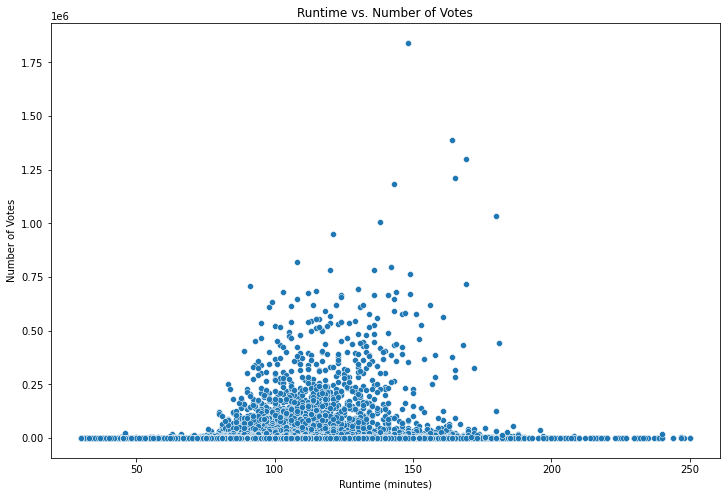

In [308]:
# Scatter plot of runtime vs. number of votes
plt.figure(figsize=(12, 8))
sns.scatterplot(x='runtime_minutes', y='numvotes', data=movies_df)
plt.title('Runtime vs. Number of Votes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Votes')
plt.show()


There is a high concentration of number of votes on movies with a runtime of 90 to 150 minutes

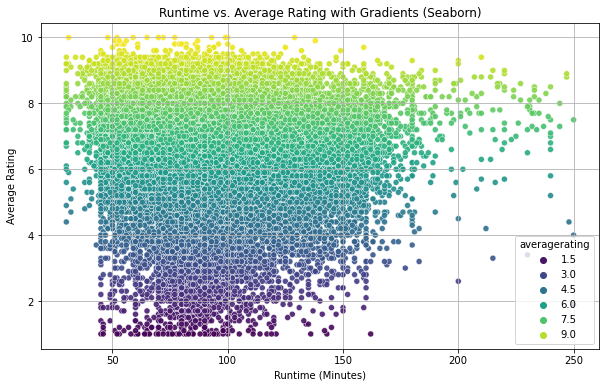

In [283]:
# Create a scatter plot of runtime vs. average rating with gradients using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='runtime_minutes',
    y='averagerating',
    hue='averagerating',  # Use average rating for color gradient
    palette='viridis',  # Choose a colormap (you can change it to another colormap)
    data=movies_df,
    alpha=0.9,  # Adjust the transparency
)

plt.title('Runtime vs. Average Rating with Gradients (Seaborn)')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

The highest average ratings in movies are those that have a duration of more than 50 minutes and less than 150 minutes

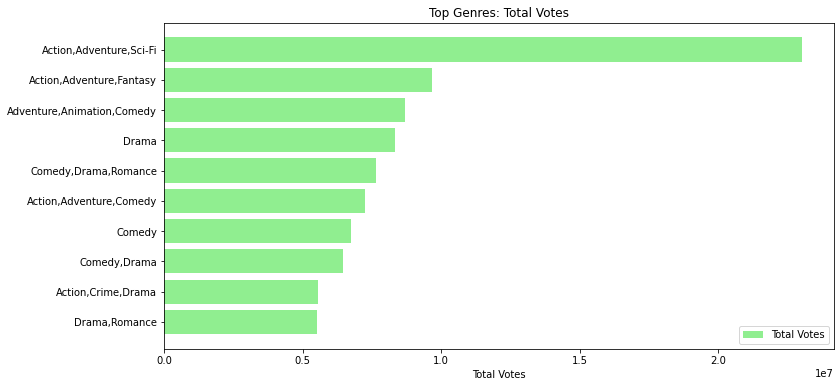

In [310]:
# Calculate the average rating for each genre
genre_avg_rating = movies_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

# Calculate the total number of votes for each genre
genre_total_votes = movies_df.groupby('genres')['numvotes'].sum().sort_values(ascending=False)

# Create a side-by-side bar graph
plt.figure(figsize=(12, 6))
# plt.barh(genre_avg_rating[:10].index, genre_avg_rating[:10], color='lightblue', label='Average Rating')
plt.barh(genre_total_votes[:10].index, genre_total_votes[:10], color='lightgreen', label='Total Votes')
plt.title('Top Genres: Total Votes')
plt.xlabel('Total Votes')
plt.legend()
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest ratings/votes at the top
plt.show()



The highest rated movie genre is a combination of Action,Adventure and sci-Fi

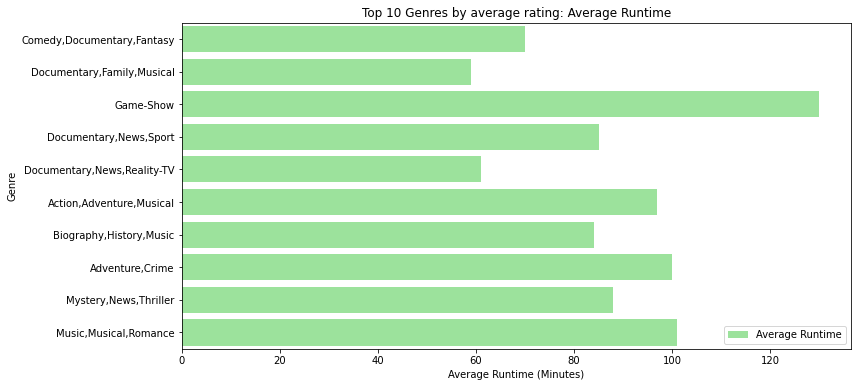

In [289]:
# Calculate the average rating for each genre
genre_avg_rating = movies_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

# Select the top 10 genres by average rating
top_10_genres_rating = genre_avg_rating.head(10)

# Calculate the average runtime for each genre
genre_avg_runtime = movies_df.groupby('genres')['runtime_minutes'].mean().loc[top_10_genres_rating.index]

# Create a vertical bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_avg_runtime, y=top_10_genres_rating.index, color='lightgreen', label='Average Runtime')
plt.title('Top 10 Genres by average rating: Average Runtime')
plt.xlabel('Average Runtime (Minutes)')
plt.ylabel('Genre')
plt.legend(loc='lower right')
plt.show()


The top 10 genres according to average rating have a runtime of 60 to 100 minutes, with game shows having about 140 minutes

### Visualizations for the movie gross dataframe


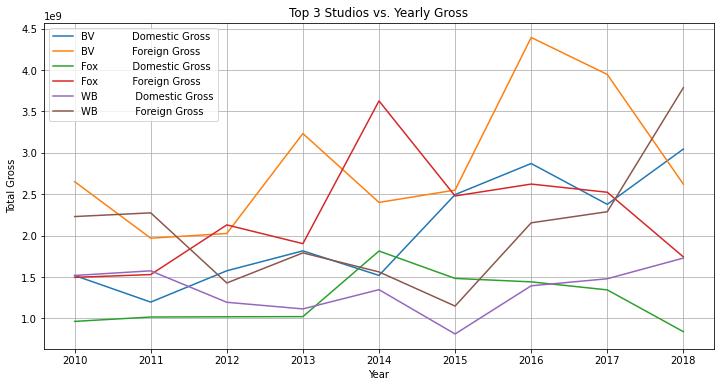

In [307]:
# Group the DataFrame by studio and year, and calculate the sum of domestic and foreign gross
studio_yearly_gross = movie_gross.groupby(['studio', 'year'])[['domestic_gross', 'foreign_gross']].sum()

# Calculate the total gross for each studio
studio_total_gross = studio_yearly_gross.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()

# Select the top 3 studios by total gross (domestic + foreign)
top_3_studios = studio_total_gross.sum(axis=1).nlargest(3).index

# Create line charts for each of the top 3 studios with labels
plt.figure(figsize=(12, 6))
for studio in top_3_studios:
    studio_data = studio_yearly_gross.loc[studio]
    plt.plot(studio_data.index, studio_data['domestic_gross'], label=f'{studio} Domestic Gross')
    plt.plot(studio_data.index, studio_data['foreign_gross'], label=f'{studio} Foreign Gross')
    
plt.title('Top 3 Studios vs. Yearly Gross')
plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.legend()
plt.grid(True)
plt.show()

In all the top 3 studios the foreign gross income is higher than the foreign domestic gross over the years. 


## Conclusion

The following are the conclusions of the Exploratory Data Analysis:

1. Data Quality Assessment:

The quality of the sales data has been improved by addressing missing values, duplicates, and inconsistencies. The dataset is now more reliable for further analysis.

2. Data Completeness:

The percentage of missing values has been assessed for each column with missing data and has been dealt with by dropping them where necessary

3. Data Types:

Data types have been reviewed and adjusted as needed. String object data types for numeric data have been converted too float

4. Descriptive Statistics:

Descriptive statistics have been calculated to summarize key attributes of the dataset. Measures of central tendency (mean, median, mode) and dispersion (range, standard deviation) have been computed.

5. Outliers: Outliers in the have been eliminated in the movie runtime column, so as to remain with movies with a duration of at least 30 minutes and at most 250 minutes

## Recommendations

### The following are the recommendations that Microsoft should consider while getting into the movie creation industry:
1. Microsoft should make movies that are of medium length, between 90 and 150 minutes as they receive the highest number of votes. 

2. They should consider mixing genres in their movie production, specifically action with adventure and Sci-Fi or Fantasy as the two combinations are the most popular according to the average movie rating.

3. They need to tap into the foreign market more than the domestic market since trends show that the most successful movie studios generate more revenue from the foreign markets. 

